## Observational social learning task with a reinforcement-learning-based network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import pandas as pd
import time
# from RL import *
from RL2 import *

In [2]:
sid = 1
z = 0.0
a = 1.5e-4
b = 0.1
decay = 'stages'
s = [1,b,b,b]
# trial = 1

start = time.time()
for trial in range(1, 3):
    env = Environment(sid=sid, trial=trial, decay=decay, s=s)
    net_dir, sim_dir = simulate_RL(env=env, seed_net=sid, z=z, a=a, progress_bar=False, direct=True)
end = time.time()
print(f"direct runtime={end-start:.4}")

start = time.time()
for trial in range(1, 3):
    env = Environment(sid=sid, trial=trial, decay=decay, s=s)
    net, sim = simulate_RL(env=env, seed_net=sid, z=z, a=a, progress_bar=False)
end = time.time()
print(f"lif runtime={end-start:.4}")

direct runtime=1.483
lif runtime=18.31


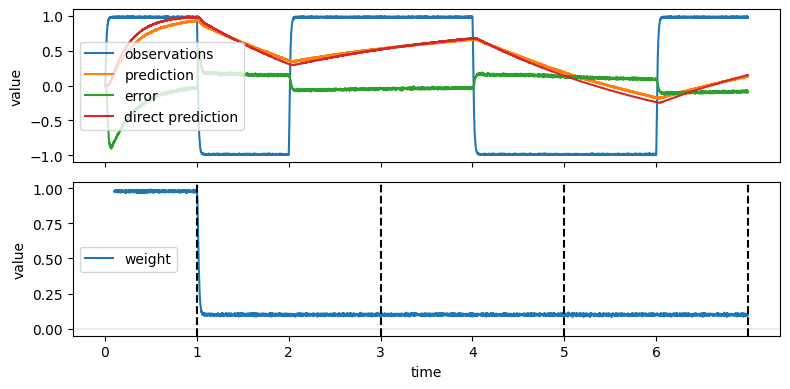

In [3]:
times = sim.trange().flatten()
input_obs = sim.data[net.probe_input].flatten()
obs = sim.data[net.probe_obs].flatten()
weight = sim.data[net.probe_weight].flatten()
error = sim.data[net.probe_error].flatten()
prediction = sim.data[net.probe_prediction].flatten()
combined = sim.data[net.probe_combined]
def cumulative_average(a):
    return np.cumsum(a) / np.arange(1, len(a) + 1)
cumavg = cumulative_average(input_obs)

predictions_direct = sim_dir.data[net_dir.probe_prediction].flatten()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,4), sharex=True)
sns.lineplot(x=times, y=obs, ax=axes[0], label='observations')
sns.lineplot(x=times, y=prediction, ax=axes[0], label='prediction')
sns.lineplot(x=times, y=error, ax=axes[0], label='error')
# sns.lineplot(x=times, y=cumavg, ax=axes[0], label='cumulative average')
# sns.lineplot(x=times, y=math_exp, ax=axes[0], label='math')
sns.lineplot(x=times, y=predictions_direct, ax=axes[0], label='direct prediction')

sns.lineplot(x=times[100:], y=weight[100:], ax=axes[1], label='weight')
# sns.lineplot(x=times, y=combined[:,0], ax=axes[1], label='combined')
# sns.lineplot(x=times, y=combined[:,1], ax=axes[1], label='combined')
# sns.lineplot(x=times, y=combined[:,2], ax=axes[1], label='combined')

axes[1].axhline(0, color='k', lw=0.1)
axes[1].axvline(env.time_sample, color='k', ls='--')
axes[1].axvline(env.time_sample+env.n_neighbors*env.time_sample, color='k', ls='--')
axes[1].axvline(env.time_sample+2*env.n_neighbors*env.time_sample, color='k', ls='--')
axes[1].axvline(env.time_sample+3*env.n_neighbors*env.time_sample, color='k', ls='--')
axes[0].set(xlabel='time', ylabel='value')
axes[1].set(xlabel='time', ylabel='value', xticks=np.arange(0, env.T+env.dt, env.time_sample))  # , ylim=(0.9, 1.4))
plt.tight_layout()